# Stroke Pre-Processing and Training Data<a id='4_Pre-Processing_and_Training_Data'></a>

## 3 Introduction<a id='4.2_Introduction'></a>





In this notebook you'll start to build machine learning models. Before even starting with learning a machine learning model, however, start by considering how useful the mean value is as a predictor. This is more than just a pedagogical device. You never want to go to stakeholders with a machine learning model only to have the CEO point out that it performs worse than just guessing the average! Your first model is a baseline performance comparitor for any subsequent model. You then build up the process of efficiently and robustly creating and assessing models against it. The development we lay out may be little slower than in the real world, but this step of the capstone is definitely more than just instructional. It is good practice to build up an understanding that the machine learning pipelines you build work as expected. You can validate steps with your own functions for checking expected equivalence between, say, pandas and sklearn implementations.

## 3 Imports<a id='4.3_Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime
#from library.sb_utils import save_file

## 4.4 Load Data<a id='4.4_Load_Data'></a>

In [2]:
stroke_data = pd.read_csv('../data/stroke_data_cleaned.csv')
stroke_data.head().T

,0,1,2,3,4
gender,1.00,0.000000,1.00,0.00,0.00
age,67.00,61.000000,80.00,49.00,79.00
hypertension,0.00,0.000000,0.00,0.00,1.00
heart_disease,1.00,0.000000,1.00,0.00,0.00
ever_married,1.00,1.000000,1.00,1.00,1.00
avg_glucose_level,228.69,202.210000,105.92,171.23,174.12
bmi,36.60,28.893237,32.50,34.40,24.00
smoking_status,1.00,0.000000,0.00,1.00,0.00
stroke,1.00,1.000000,1.00,1.00,1.00
residence_type,1.00,0.000000,0.00,1.00,0.00


Big Mountain is your resort. Separate it from the rest of the data to use later.

In [3]:
stroke_data.shape

(5109, 10)

## 4.6 Train/Test Split<a id='4.6_Train/Test_Split'></a>

What partition sizes would you have with a 70/30 train/test split?

In [4]:
len(stroke_data) * .7, len(stroke_data) * .3

(3576.2999999999997, 1532.7)

In [5]:
X = stroke_data.drop('stroke', axis=1)
y = stroke_data[['stroke']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=47)

In [6]:
X_train.shape, X_test.shape 
#gradent boost but jeff rec - Random forest! 

# put logistic regression in as well, simplistic binary classification

#now fitting models, predict on test

#look at logreg for height and weight.

((3576, 9), (1533, 9))

In [7]:
X_train.head() 

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,residence_type
1716,0,33.0,0,0,1,124.01,22.700000,0,0
3096,0,13.0,0,0,0,76.55,29.100000,0,1
2399,0,33.0,0,0,1,112.94,43.000000,0,0
2541,1,79.0,0,1,1,82.27,28.893237,0,0
1841,1,12.0,0,0,0,213.87,25.300000,0,0


In [8]:
y_train.head()

,stroke
1716,0
3096,0
2399,0
2541,0
1841,0


In [9]:
y_train.value_counts() #imbalanced dataset

stroke
0         3412
1          164
dtype: int64

In [10]:
clf = RandomForestClassifier() #max_depth=2, random_state=0 add in future
clf.fit(X_train, y_train)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [11]:
accuracy_score(y_test, clf.predict(X_test)) #gets accuracy score.

0.9419439008480104

In [12]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]) #roc/auc score tells how 
#well model is sorting the data.
#67% of the time between stroke and non-stroke, it gives the probablility to 
#the no-stroke case 67% of the time. ## RERAN AND GOT 70%%
#if it was 0.50 or 50% which is the low bar, above .5 means your model 
#is learning something.

#RERAN AND GOT 70%%

0.702177445563861

In [13]:
print(classification_report(y_test, clf.predict(X_test))) #no stroke, right 94% of the time

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1448
           1       0.00      0.00      0.00        85

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.92      1533



<AxesSubplot:>

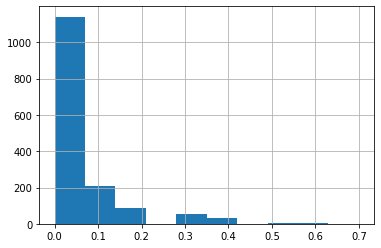

In [14]:
#plot histogram of all predicted probabilites, maybe skewd towards 0
#tricky, b/c HUGE imbalance
#need to shift the threshold down, there is tradeoff. If you want to be VERY precise, need to set bar high.

#need to make a threshold. 
pd.Series(clf.predict_proba(X_test)[:,1]).hist()

In [18]:
#next steps: what the model has learned

#feature importances; which variables are important in the decision. what does the model think is important
#partial dependence plots; try those


#continue on, or fit a new model. 
#either grid search, gradient boosting, random forest.

#full circle 

In [19]:
#feature importances
#trying this prep data

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={'Attribute': X_train.columns, 'Importance': model.coef_[0]})
importances = importances.sort_values(by='Importance', ascending=False)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


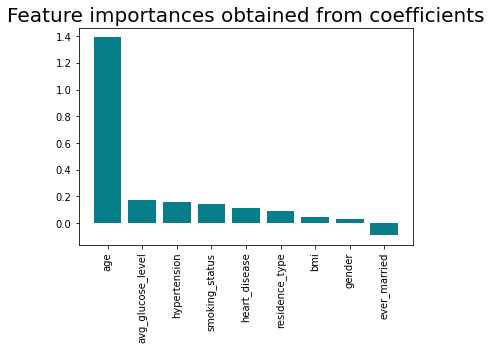

In [21]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

Most important feature is age?
Interesting.

In [24]:
from sklearn.inspection import partial_dependence
from sklearn.ensemble import GradientBoostingClassifier
#pdp, axes = partial_dependence(clf, X, [0])


In [25]:

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X, y)
features = [0, 1]
plot_partial_dependence(clf, X, features, kind='individual') 

ValueError: Unknown label type: 'continuous'

In [26]:
plot_partial_dependence(clf, X, features, kind='both')

NameError: name 'plot_partial_dependence' is not defined

In [ ]:
#Save the 'Name', 'state', and 'Region' columns from the train/test data into 
#names_train and names_test
#Then drop those columns from `X_train` and `X_test`. Use 'inplace=True'

#I am saving these columns from the train/test data into stroke_factors_list, and then into
#factors_train and factors_test
#bmi, hypertension, avg_glucose_level

stroke_factors_list = ['bmi', 'hypertension', 'avg_glucose_level']
factors_train = X_train[stroke_factors_list]
factors_test = X_test[stroke_factors_list]
X_train.drop(columns=stroke_factors_list, inplace=True)
X_test.drop(columns=stroke_factors_list, inplace=True)
X_train.shape, X_test.shape

In [ ]:
#Check the `dtypes` attribute of `X_train` to verify all features are numeric
X_train.dtypes